In [ ]:
# ! pip install geopandas 

In [ ]:
! conda install -c conda-forge geopandas

In [ ]:
conda install -c anaconda pysal

## Start from below:

In [31]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import os

# import pysal as ps
# from pysal.contrib.viz import mapping as maps

In [32]:
# load data
dataPath = "/mnt/data/"
xls = pd.ExcelFile(dataPath+"ces3results.xlsx")
sheets = xls.sheet_names
print(sheets)

['CES 3.0 (2018 Update)', 'Data Dictionary', 'Missing&NAData', 'Demographic profile']


In [33]:
df = pd.read_excel(xls, sheet_name=sheets[0])

df.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752


In [34]:
# conver to geopandas
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

gdf.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,geometry
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314,POINT (-119.78170 36.70970)
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210,POINT (-117.61801 34.05778)
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388,POINT (-119.80550 36.73549)
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241,POINT (-121.31452 37.94052)
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752,POINT (-119.71784 36.68160)


In [55]:
gdf.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 

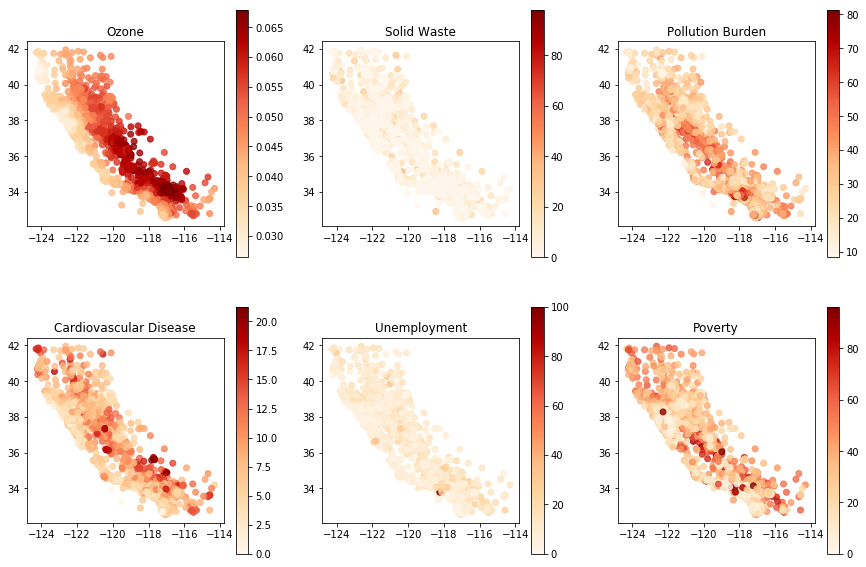

In [81]:
features = ['Ozone','Solid Waste','Pollution Burden','Cardiovascular Disease','Unemployment','Poverty']

ncol = 3
numPlot = len(features)
nrow = int(np.ceil(numPlot/ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(15,5*nrow))

for i,feature in enumerate(features):
    ax = axs[int(i/ncol),i%ncol]
    gdf.plot(ax=ax,column=feature,cmap='OrRd', legend=True, alpha=0.8)
    ax.set_title(feature)


plt.show()

In [69]:
# plot

# feature = 'Ozone'
# gdf.plot(column=feature,cmap='OrRd', legend=True, figsize=(10,10))
# plt.title(feature)
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

In [75]:
nrow

2